# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=KMeans(n_clusters=8)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)



In [5]:
silhouette_8

0.5398971441034115

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:

kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)
silhouette_8

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)
silhouette_8

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [9]:
%pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
from yellowbrick.cluster import KElbowVisualizer

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3bfe7de50>
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe3bfe7de50>
Traceback (most recent call last):
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/usuario/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


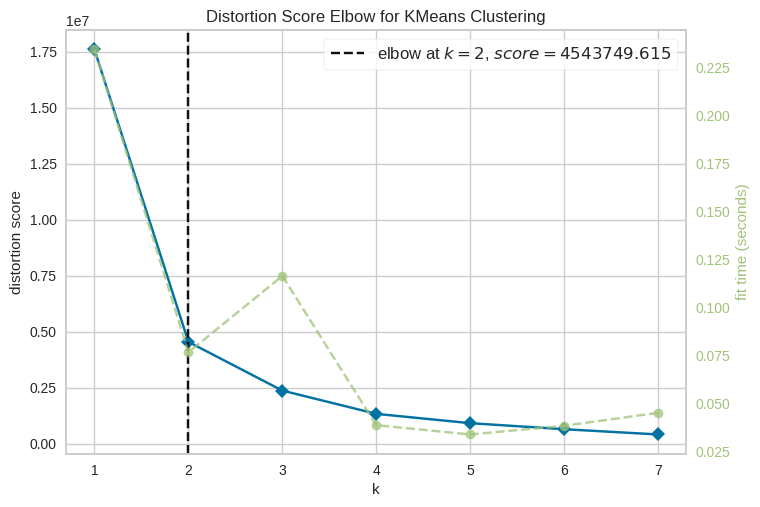

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,8), metric='distortion')


visualizer.fit(X)


visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

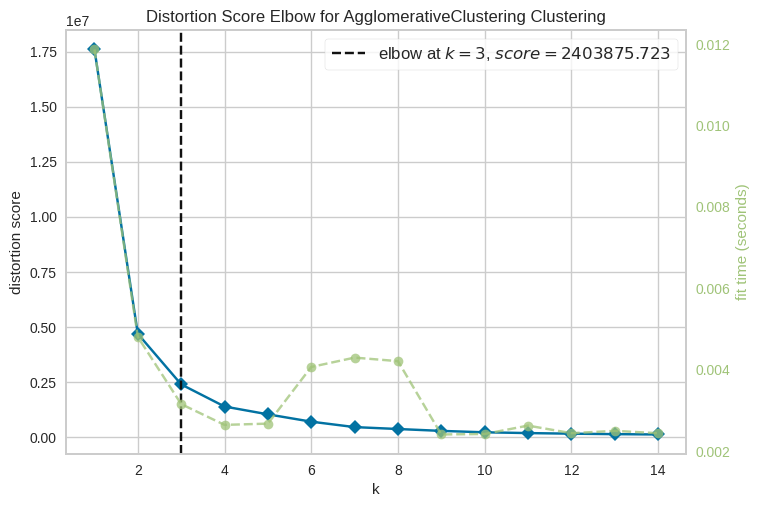

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from sklearn.cluster import AgglomerativeClustering


# crear el modelo AgglomerativeClustering
modelo_agg = AgglomerativeClustering(n_clusters=8)

# crear el objeto visualizador y ajustarlo a los datos
visual_agg = KElbowVisualizer(modelo_agg, k=(1,15))
visual_agg.fit(X)

# mostrar la gráfica
visual_agg.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

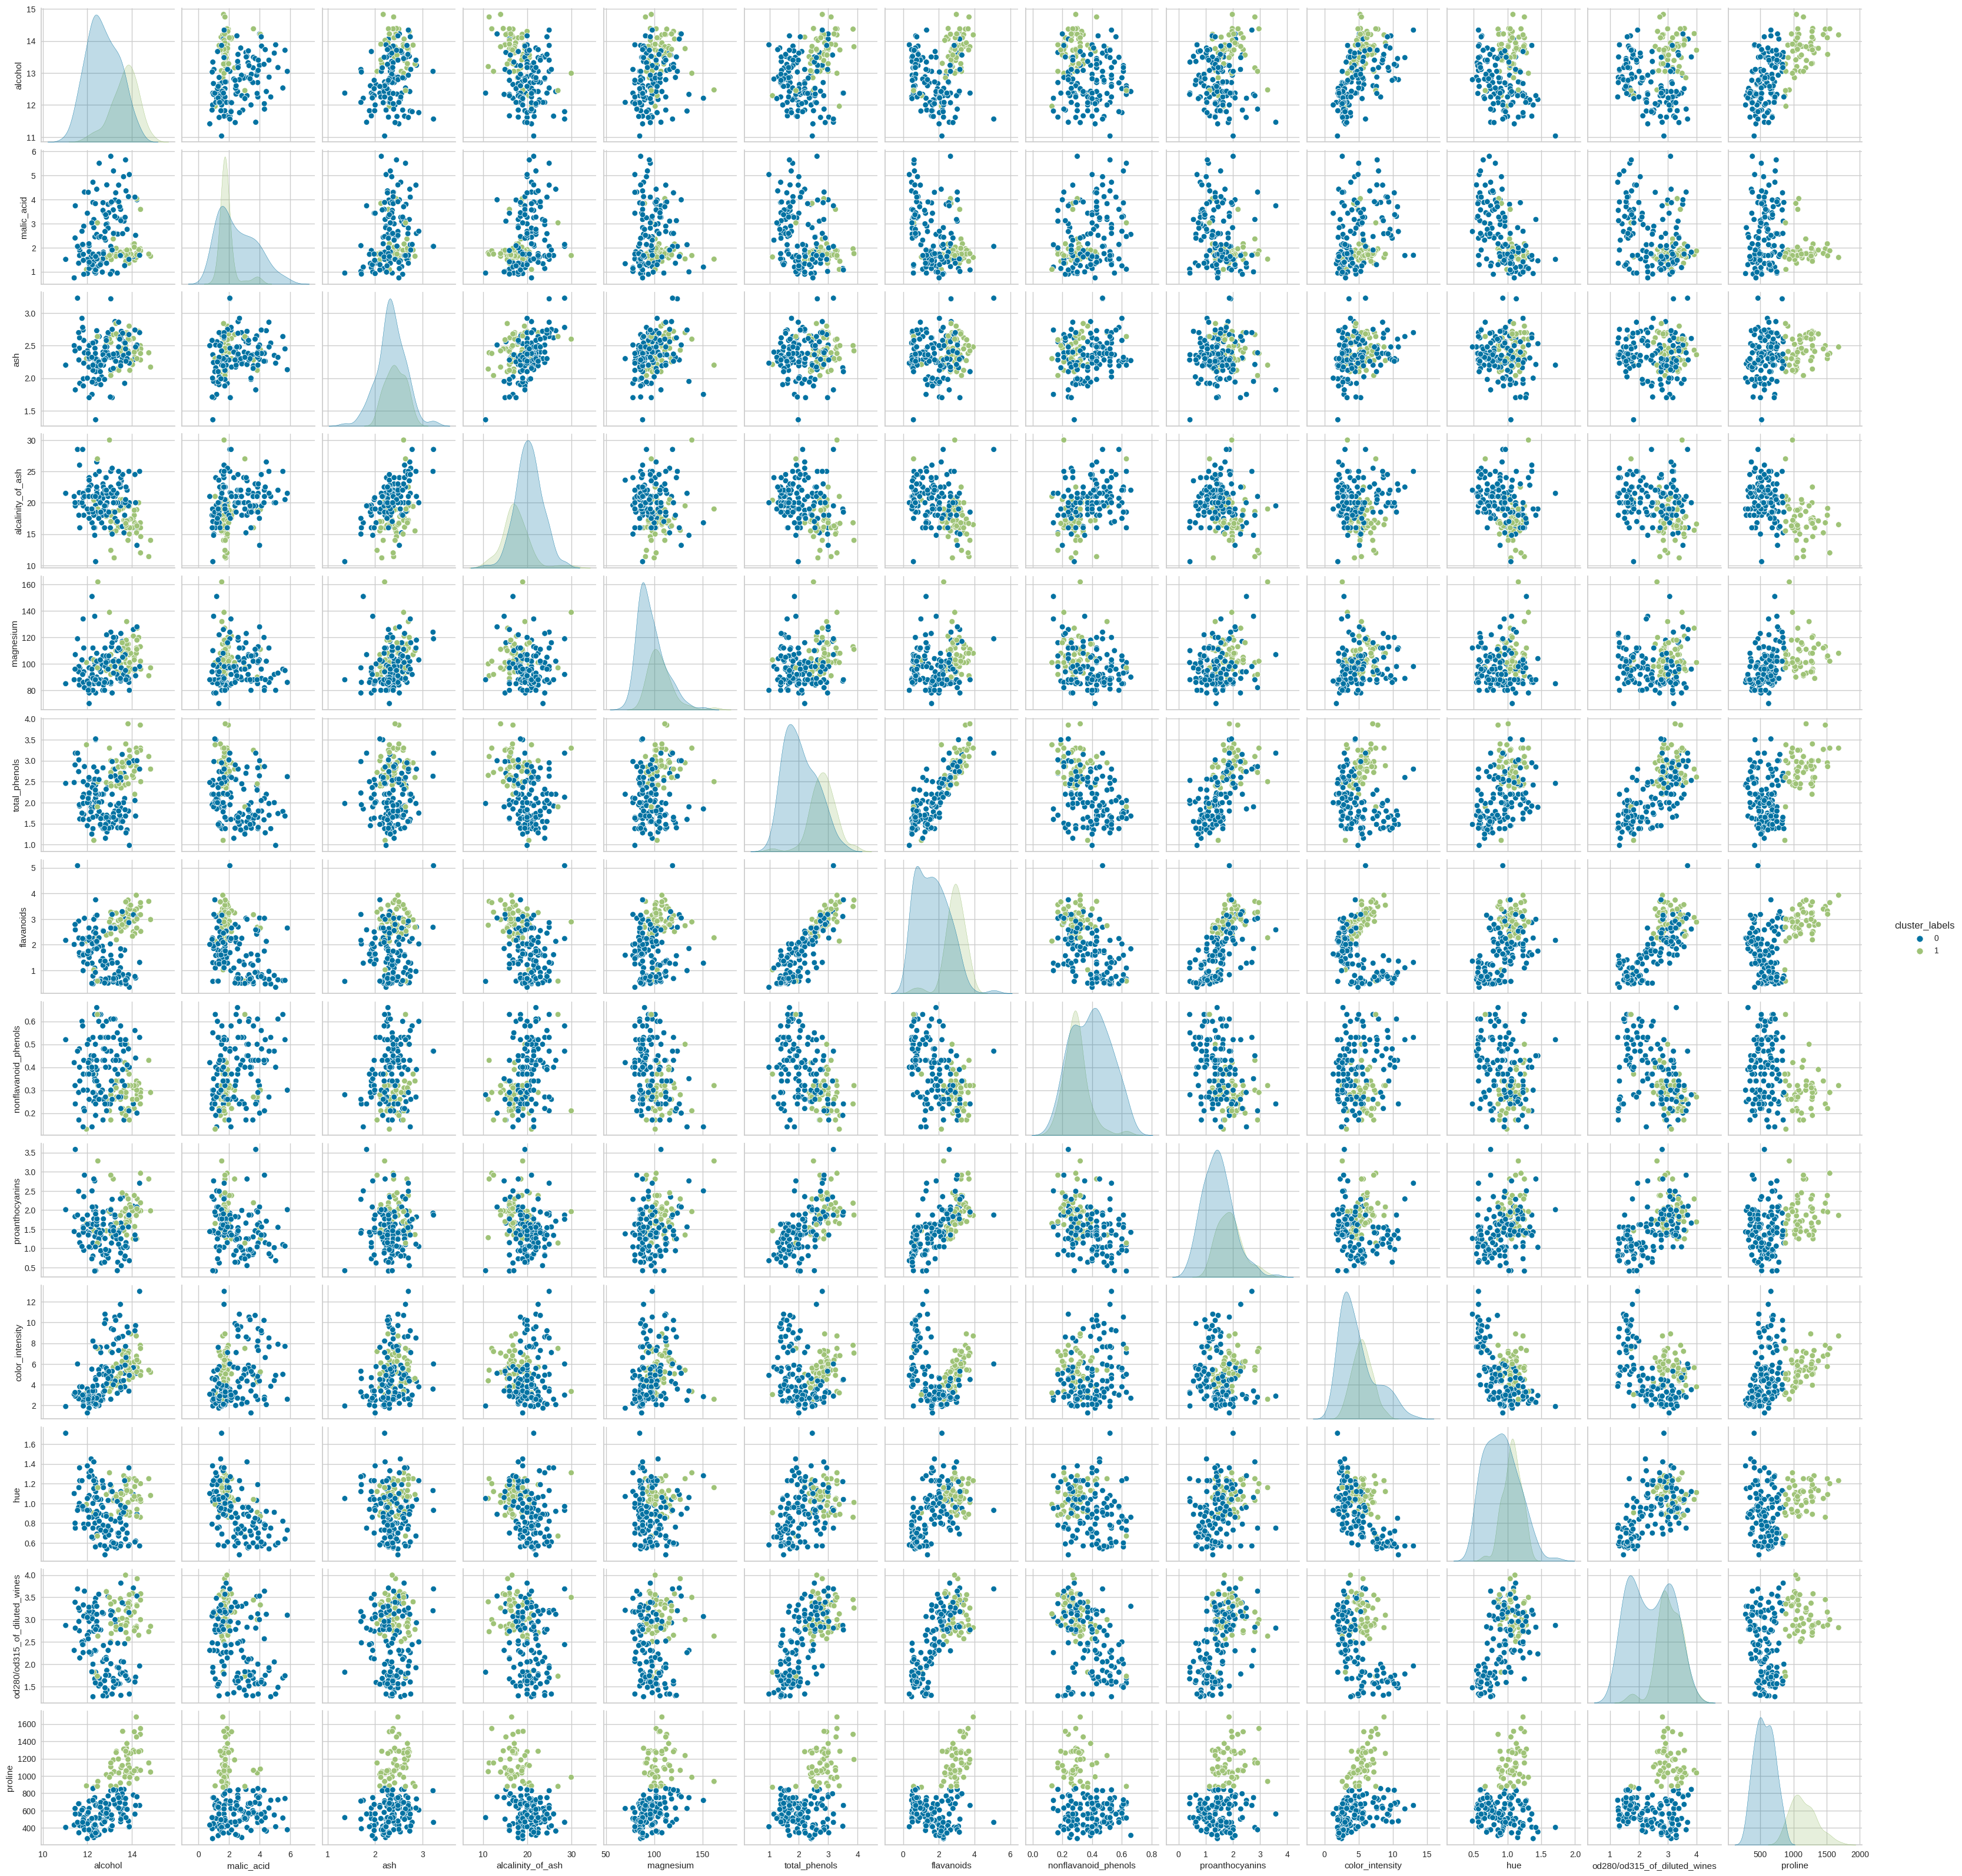

In [34]:
import seaborn as sns


kmeans_model = KMeans(n_clusters=2, random_state=42)

# Entrenar el modelo con los datos X
kmeans_model.fit(X)from sklearn.decomposition import PCA
pca=PCA().fit(X)

pca_x=pca.transform(X)

pca_x.shape
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_model.labels_)
plt.xlabel('1er componente principal')
plt.ylabel('2do componente principal')
plt.title('PCA con etiquetas de cluster')
plt.show()

# Agregar etiquetas de cluster a nuestro marco de datos X
X['cluster_labels'] = kmeans_model.labels_

# Crear una matriz de dispersión
sns.pairplot(X, hue='cluster_labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.